In [1]:
import papyrus_scripts
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

from mycolorpy import colorlist as mcp
import numpy as np
from matplotlib.patches import Patch

from rdkit import Chem
from rdkit import RDConfig
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdMolHash
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.ML.Cluster import Butina
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize=(450,350)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)

from IPython.display import SVG,Image
from ipywidgets import interact

import rdkit

In [15]:
def read_annotated_combined_data(accession):
    data = pd.read_csv('C:\\Users\gorostiolam\Documents\Gorostiola Gonzalez, '
                       'Marina\PROJECTS\\6_Mutants_PCM\PROTOCOLS-SCRIPTS\Python\mutants-in-pcm\data\chembl31'
                       '-annotated_papyrus05.5nostereo_data_with_mutants.csv', sep='\t')

    accession_data = data[data['accession'] == accession]

    return accession_data

In [17]:
def filter_explore_activity_data(papyrus_version, target_accession_list):
    """
    Filter Papyrus dataset for targets of interest and explore the statistics of the resulting dataset

    Parameters
    ----------
    papyrus_version : str
        Version of the Papyrus dataset to read
    targets : dict
        Dictionary with target labels as keys and UniProt accession codes as values

    Returns
    -------
    pandas.DataFrame
        Filtered bioactivity dataset for input targets
    """
    # Read downloaded Papyrus dataset in chunks, as it does not fit in memory
    CHUNKSIZE = 100000
    data = papyrus_scripts.read_papyrus(
        version=papyrus_version, chunksize=CHUNKSIZE)

    # Create filter for targets of interest
    filter = papyrus_scripts.keep_accession(data, target_accession_list)

    # Iterate through chunks and apply the filter defined
    filtered_data = papyrus_scripts.preprocess.consume_chunks(
        filter,
        total=-(
            -papyrus_scripts.utils.IO.get_num_rows_in_file("bioactivities", False) // CHUNKSIZE
        ),
    )

    # Plot distribution of activity values (pchembl_value_Mean) per target
    g = sns.displot(
        filtered_data,
        x="pchembl_value_Mean",
        hue="target_id",
        element="step"
    )

    return filtered_data

In [6]:
output_dir = 'C:\\Users\gorostiolam\Documents\Gorostiola Gonzalez, Marina\PROJECTS\\6_Mutants_PCM\DATA\\2_Analysis\\0_mutant_statistics'
target_ids = ['P00533']
accession = target_ids[0]

  0%|          | 0/13 [00:00<?, ?it/s]

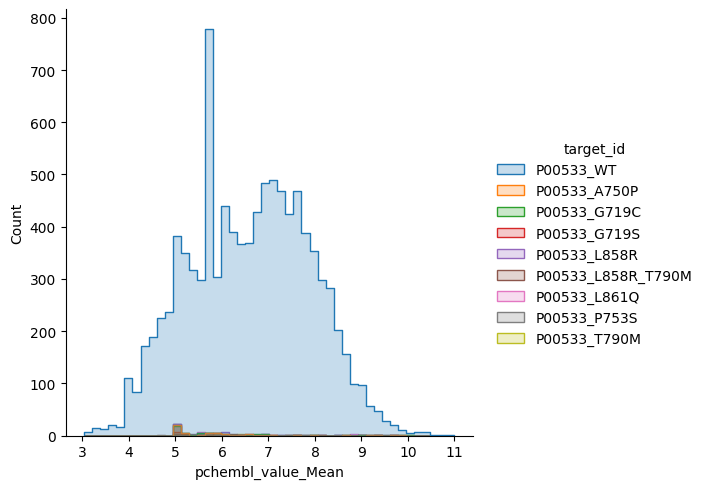

In [18]:
papyrus_accession_data = filter_explore_activity_data('05.5', target_ids)

In [19]:
papyrus_accession_data

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_KD,type_Ki,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
1,AAAAZQPHATYWOK_on_P00533_WT,High,Sharma2016,4277046;CHEMBL175513;4277046;CHEMBL175513;4277...,CCOc1c(NC(=O)C=CCN(C)C)cc2c(Nc3cc(Cl)c(OCc4nc5...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,13,14,2,32,31,10,33,30,9,36,3...",P00533_WT,...,0;0;0;0;0;0;0;1;1;1,0;0;0;0;1;1;1;0;0;0,=,6.726;6.73;6.726;6.73;6.063;6.726;6.73;6.063;6...,6.595000,0.280395,0.088669,10.0,6.7260,0.0040
29,AAALVYBICLMAMA_on_P00533_WT,High,Sharma2016,2022,O=C1NC(=O)c2c1cc(Nc1ccccc1)c(Nc1ccccc1)c2,AAALVYBICLMAMA,AAALVYBICLMAMA-UHFFFAOYSA-N,InChI=1S/C20H15N3O2/c24-19-15-11-17(21-13-7-3-...,"""AuxInfo=1/1/N:14,22,13,15,21,23,12,16,20,24,8...",P00533_WT,...,0;0;0;0;0;0;1;1;1;1;1;1,1;1;1;1;1;1;0;0;0;0;0;0,=,6.523;5.347;6.796;5.187;4.939;6.523;6.523;5.34...,5.885833,0.776422,0.224134,12.0,5.9350,0.6680
136,AABTVDZTFBSBKN_on_P00533_WT,High,ChEMBL30,CHEMBL384067;CHEMBL384067;4369965;44416433;CHE...,COc1c(OC)cc2Oc3c(c(Oc4cc(Br)ccc4)ncn3)N(C)Cc2c1,AABTVDZTFBSBKN,AABTVDZTFBSBKN-UHFFFAOYSA-N,InChI=1S/C20H18BrN3O4/c1-24-10-12-7-16(25-2)17...,"""AuxInfo=1/0/N:25,1,6,19,18,20,28,15,7,26,22,2...",P00533_WT,...,0;0;0;0;0;0;0;0;0;0;0;0;1;1;1;1,0;0;0;0;0;0;0;0;1;1;1;1;0;0;0;0,=,5.92;5.21;5.337;5.921;5.92;5.21;5.337;5.921;5....,5.597000,0.337313,0.084328,16.0,5.6285,0.2920
360,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3c2nc(Nc2cn(C)nc...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,0;0;0;1,0;0;1;0,=,7.276;7.276;7.276;7.276,7.276000,0.000000,0.000000,4.0,7.2760,0.0000
403,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1c(Nc2nc3c(cn2)CN(C)C(=O)N3c2cc(N)ccc2)ccc(...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,0;0;0;0;0;0;0;1;1;1,0;0;0;0;1;1;1;0;0;0,=,5.311;4.952;5.311;4.952;5.311;6.321;4.952;5.31...,5.369400,0.529320,0.167386,10.0,5.3110,0.3590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238641,ZZXUNAFAKNKXFW_on_P00533_WT,High,Sharma2016,10013098;Christmann2016.compound.1354;10013098...,CCCCCCCCCCCCCCCC[n+]1c(C)n(Cc2ccccc2)cc1,ZZXUNAFAKNKXFW,ZZXUNAFAKNKXFW-UHFFFAOYSA-N,InChI=1S/C27H45N2/c1-3-4-5-6-7-8-9-10-11-12-13...,"""AuxInfo=1/0/N:1,19,2,3,4,5,6,7,8,9,10,11,12,1...",P00533_WT,...,0;0;0;0;0;0;1;1,0;0;0;0;1;1;0;0,=,5.8;5.8;5.8;5.8;5.8;5.8;5.8;5.8,5.800000,0.000000,0.000000,8.0,5.8000,0.0000
1238712,ZZYKWZOXZDVUNU_on_P00533_WT,High,Sharma2016,4354965,CC#CC(=NOCCNCCNC(C)=O)c1cc2c(cc1)ncnc2Nc1cc(Cl...,ZZYKWZOXZDVUNU,ZZYKWZOXZDVUNU-UHFFFAOYSA-N,InChI=1S/C30H30ClN7O3/c1-3-6-27(38-41-16-15-32...,"""AuxInfo=1/1/N:1,14,2,38,37,3,39,21,41,20,40,3...",P00533_WT,...,0;0;0;1,0;0;1;0,=,8.149;8.149;8.149;8.149,8.149000,0.000000,0.000000,4.0,8.1490,0.0000
1238721,ZZYQRNUCVQHRCZ_on_P00533_WT,High,Sharma2016,4330189,O=C(O)c1c2NC(=O)N(c3cc(Cl)c(F)cc3)c3ncnc(c32)s1,ZZYQRNUCVQHRCZ,ZZYQRNUCVQHRCZ-UHFFFAOYSA-N,InChI=1S/C14H6ClFN4O3S/c15-6-3-5(1-2-7(6)16)20...,"""AuxInfo=1/1/N:17,16,11,20,10,12,14,23,5,4,18,...",P00533_WT,...,0;0;0;1,0;0;1;0,=,5.77;5.77;5.77;5.77,5.770000,0.000000,0.000000,4.0,5.7700,0.0000
1238722,ZZYRBJVUKKZJCS_on_P00533_WT,High,Sharma2016,10038801,C=CC(=O)Nc1cccc(Nc2nc3c(cn2)ncc(=O)n3-c2ccc(OC...,ZZYRBJVUKKZJCS,ZZYRBJVUKKZJCS-UHFFFAOYSA-N,InChI=1S/C22H18N6O3/c1-3-19(29)25-14-5-4-6-15(...,"""AuxInfo=1/1/N:1,28,2,8,7,9,24,30,25,29,31,16,...",P00533_WT,...,0;0;0;0;0;0;1;1,0;0;0;0;1;1;0;0,=,5.915;5.626;5.915;5.626;5.915;5.626;5.915;5.626,5.770500,0.154477,0.054616,8.0,5.7705,0.1445


In [20]:
accession_data = read_annotated_combined_data(accession)
accession_data

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\ipykernel_launcher.py:1: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


,CID,connectivity,target_id,AID,accession,pchembl_value_Mean,SMILES,sequence,source,Activity_class
4219,CHEMBL1063796,RAHBGWKEPAQNFF,P00533_A750P,"[586818, 586818, 586818, 586818, 586818, 58681...",P00533,7.001579,CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,ChEMBL31,NaN
4220,CHEMBL1908697,XXJWYDDUDKYVKI,P00533_A750P,"[774480, 774480, 774480, 774480, 774480, 77448...",P00533,6.725000,COc1cc2c(Oc3ccc4[nH]c(C)cc4c3F)ncnc2cc1OCCCN1C...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,ChEMBL31,NaN
4221,CHEMBL4388553,QCVAULIYZATFDX,P00533_A750P,[1886876],P00533,8.100000,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,ChEMBL31,NaN
4222,CHEMBL4844330,OXTSYWDBUVRXFF,P00533_A750P,[2134720],P00533,7.220000,C=CCn1c(=O)c2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc2n1-...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,ChEMBL31,NaN
4223,CHEMBL4829488,OQKZCHBURWTIEB,P00533_C797S,"[2120341, 2120341, 2120341]",P00533,9.093333,C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)c([N+...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,ChEMBL31,NaN
...,...,...,...,...,...,...,...,...,...,...
72820,Christmann2016.compound.75,XQVVPGYIWAGRNI,P00533_T790M,Christmann2016.assay,P00533,6.444000,CCC1C(=O)N(C)c2c(nc(Nc3ccc(C(=O)NC4CCN(C)CC4)c...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,Papyrus05.5_Christmann2016,NaN
72821,Christmann2016.compound.70,XXJWYDDUDKYVKI,P00533_T790M,Christmann2016.assay,P00533,5.886000,COc1c(OCCCN2CCCC2)cc2ncnc(Oc3c(F)c4c(cc3)[nH]c...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,Papyrus05.5_Christmann2016,NaN
72822,Christmann2016.compound.20,YYLKKYCXAOBSRM,P00533_T790M,Christmann2016.assay,P00533,6.252000,O=C(c1ccc(C=Cc2c3ccccc3n[nH]2)cc1)N1CCNCC1,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,Papyrus05.5_Christmann2016,NaN
72823,Christmann2016.compound.42,ZBNZXTGUTAYRHI,P00533_T790M,Christmann2016.assay,P00533,5.638000,Cc1nc(N2CCN(CCO)CC2)cc(Nc2ncc(C(=O)Nc3c(C)cccc...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,Papyrus05.5_Christmann2016,NaN


In [67]:
# All molecules that have been tested in the target of interest
accession_subset = accession_data['connectivity'].unique().tolist()

In [45]:
def read_common_subset(accession: str, common: bool, sim: bool, sim_thres: int,
                                           threshold: int, variant_coverage: float, output_dir: str):
    # Read bioactivity data for common subset precalculated
    data_common = pd.read_csv(os.path.join(output_dir, f'modelling_dataset_{accession}_Thr{threshold}_Cov'
                                                          f'{int(variant_coverage*100)}_Sim'
                                                          f'{int(sim_thres*100)}.csv'), sep='\t')

    return data_common

def extract_unique_connectivity(data):
    common_subset = data['connectivity'].unique().tolist()
    return common_subset

In [77]:
def double_density_pchembl_year(papyrus_accession_data, common_subset, output_dir, accession, subset_name):

    # filter common subset
    papyrus_common_subset = papyrus_accession_data[papyrus_accession_data['connectivity'].isin(common_subset)]

    g = sns.JointGrid(data=papyrus_common_subset, x="Year", y="pchembl_value_Mean", hue="target_id",
                      marginal_ticks=False, palette="turbo")

    g.plot_joint(
        sns.scatterplot)
    g.plot_marginals(sns.kdeplot)

    sns.move_legend(g.ax_joint, "upper left", title='Mutants', frameon=False, bbox_to_anchor=(1.25, 1))

    g.ax_joint.set_ylabel('pChEMBL value (Mean)')

    plt.savefig(os.path.join(output_dir, f'test_year_pchembl_{accession}_{subset_name}.svg'))

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


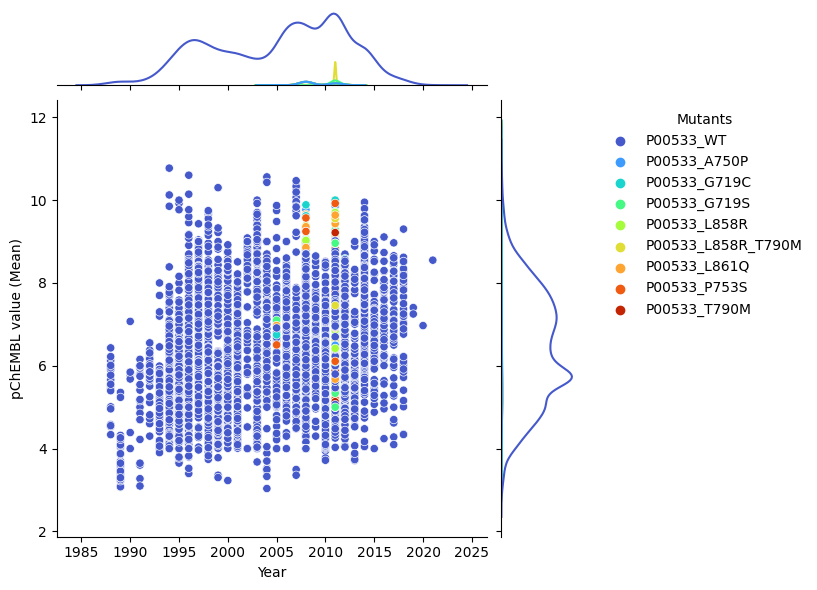

In [78]:
double_density_pchembl_year(papyrus_accession_data, accession_subset, os.path
                                                               .join(output_dir,'common_subset_20_sim_80'), accession, 'papyrus_data')

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


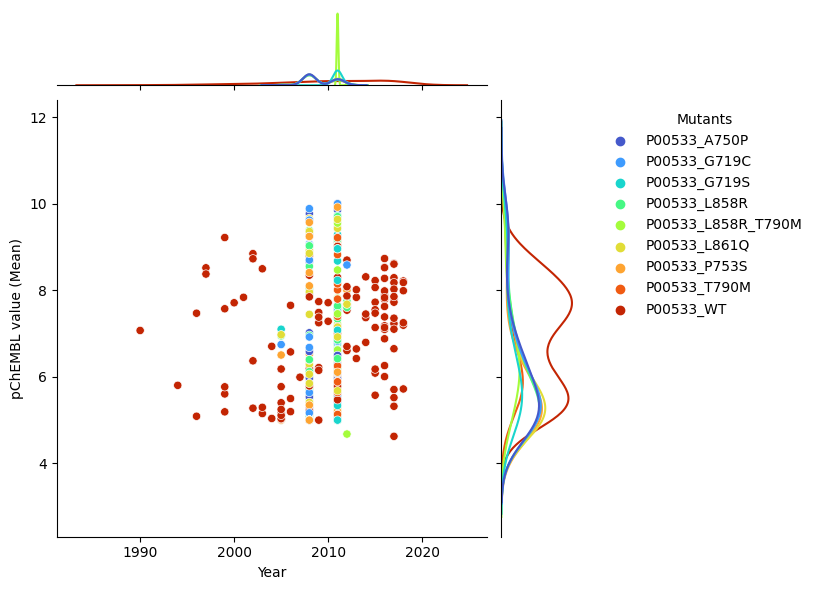

In [79]:
common_subset = extract_unique_connectivity(read_common_subset(accession, common=True, sim=True, sim_thres=0.8,
                                                            threshold=2, variant_coverage=0.2, output_dir=os.path
                                                               .join(output_dir,'common_subset_20_sim_80')))
double_density_pchembl_year(papyrus_accession_data, common_subset, os.path
                                                               .join(output_dir,'common_subset_20_sim_80'), accession, 'papyrus_common')

In [106]:
def keep_oldest_papyrus_data(data):
    data_oldest = data.groupby('connectivity', group_keys=False).apply(lambda x: x.loc[x.Year.idxmin()])
    return data_oldest

papyrus_accession_data_oldest = keep_oldest_papyrus_data(papyrus_accession_data)

In [107]:
def plot_common_subset_bioactivity_heatmap(clustermap:bool, accession: str, common: bool, sim: bool, sim_thres: int,
                                           threshold: int, variant_coverage: float, output_dir: str):
    """
    """
    # Read bioactivity data for common subset precalculated
    data_common = read_common_subset(accession, common, sim, sim_thres, threshold, variant_coverage, output_dir)

    # Pivot data to plot heatmap
    heatmap_df = data_common.pivot(index='target_id', columns='connectivity', values='pchembl_value_Mean')

    if not clustermap:
        # Heatmap with full common subset (contains NAs)
        fig, ax = plt.subplots(1, 1, figsize=(24, 5))
        sns.heatmap(heatmap_df, cmap='mako_r', linewidth=0.1, linecolor='w', square=True,
                    cbar_kws={'label': 'pChEMBL value (Mean)', 'aspect': 0.2})
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'test_heatmap_{accession}.png'))
    else:
        # Clustermap with strictly common subset (no NAs)
        sns.clustermap(heatmap_df[heatmap_df.columns[~heatmap_df.isnull().any()]], cmap='mako_r',
                       linewidth=0.1, linecolor='w', cbar_kws={'label': 'pChEMBL value (Mean)'})
        plt.savefig(os.path.join(output_dir, f'test_clustermap_{accession}.svg'))

    # Return strict common subset
    strict_subset_connectivity = list(heatmap_df[heatmap_df.columns[~heatmap_df.isnull().any()]].columns)
    return strict_subset_connectivity

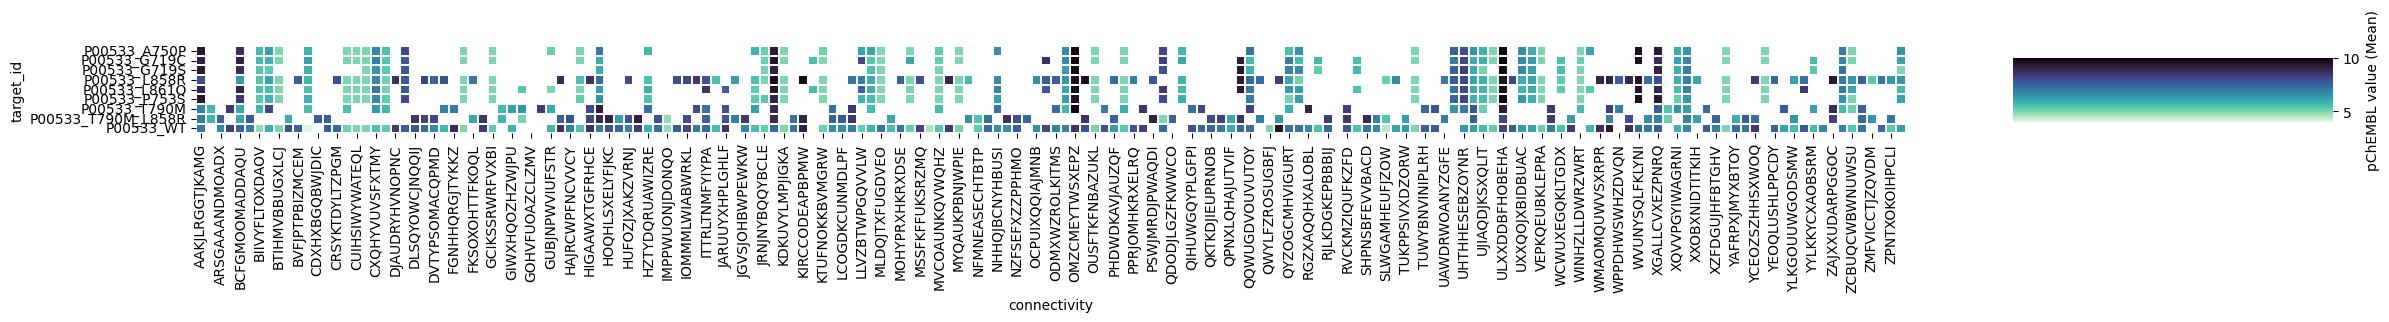

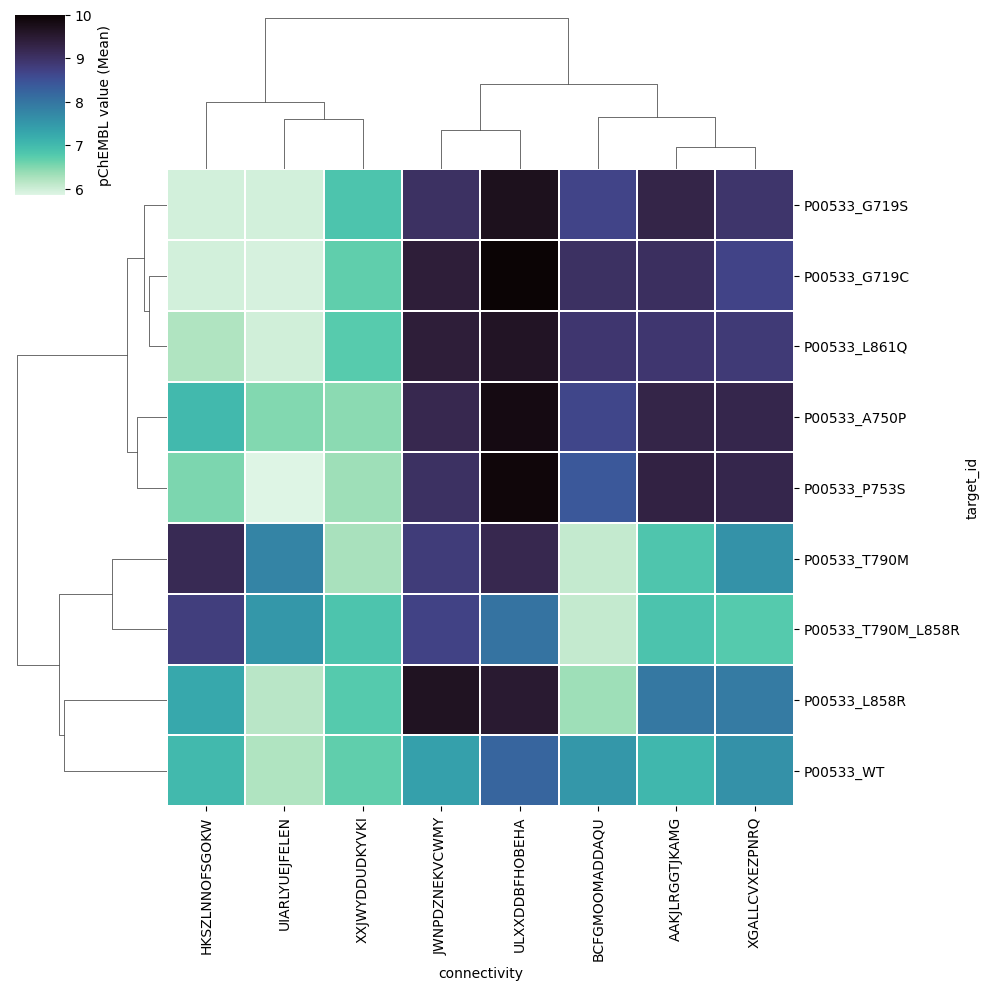

In [108]:
for clustermap in [False, True]:
    strict_subset = plot_common_subset_bioactivity_heatmap(clustermap, accession, common=True, sim=True, sim_thres=0.8, threshold=2,
                                            variant_coverage=0.2, output_dir=os.path.join(output_dir, 'common_subset_20_sim_80'))

In [7]:
def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""
    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the list
    # because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

def butina_cluster_compounds(accession_data, subset, cutoff=0.2):
    subset_df = accession_data[accession_data['connectivity'].isin(subset)]
    # Keep first occurence
    subset_df.drop_duplicates(subset='connectivity', keep='first', inplace=True, ignore_index=True)

    # Compute molecule from smiles
    PandasTools.AddMoleculeColumnToFrame(subset_df,'SMILES','Molecule',includeFingerprints=True)

    # Extract RDkit molecular objects
    mMols = subset_df['Molecule'].tolist()

    compounds = []
    for _, connectivity, mol in subset_df[["connectivity", "Molecule"]].itertuples():
        compounds.append((mol, connectivity))

    # Create fingerprints for all molecules
    rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    fplist = [rdkit_gen.GetFingerprint(mol) for mol in mMols]

    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fplist)

    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fplist), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)

    # Give a short report about the numbers of clusters and their sizes
    num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
    num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
    num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
    num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

    print("total # clusters: ", len(clusters))
    print("# clusters with only 1 compound: ", num_clust_g1)
    print("# clusters with >5 compounds: ", num_clust_g5)
    print("# clusters with >25 compounds: ", num_clust_g25)
    print("# clusters with >100 compounds: ", num_clust_g100)

    # Plot the size of the clusters
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)

    # Make dictionary mapping cluster index to connectivity
    connectivity_cluster_dict = {}
    for i,(mol,connectivity) in enumerate(compounds):
        for j,cluster in enumerate(clusters):
            if i in cluster:
                connectivity_cluster_dict[connectivity] = j + 1 # cluster numbers from 1 on (not zero)

    return clusters,compounds, connectivity_cluster_dict

In [ ]:
clusters,compounds,connectivity_cluster_dict = butina_cluster_compounds(accession_data, strict_subset, 0.7)

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:260: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


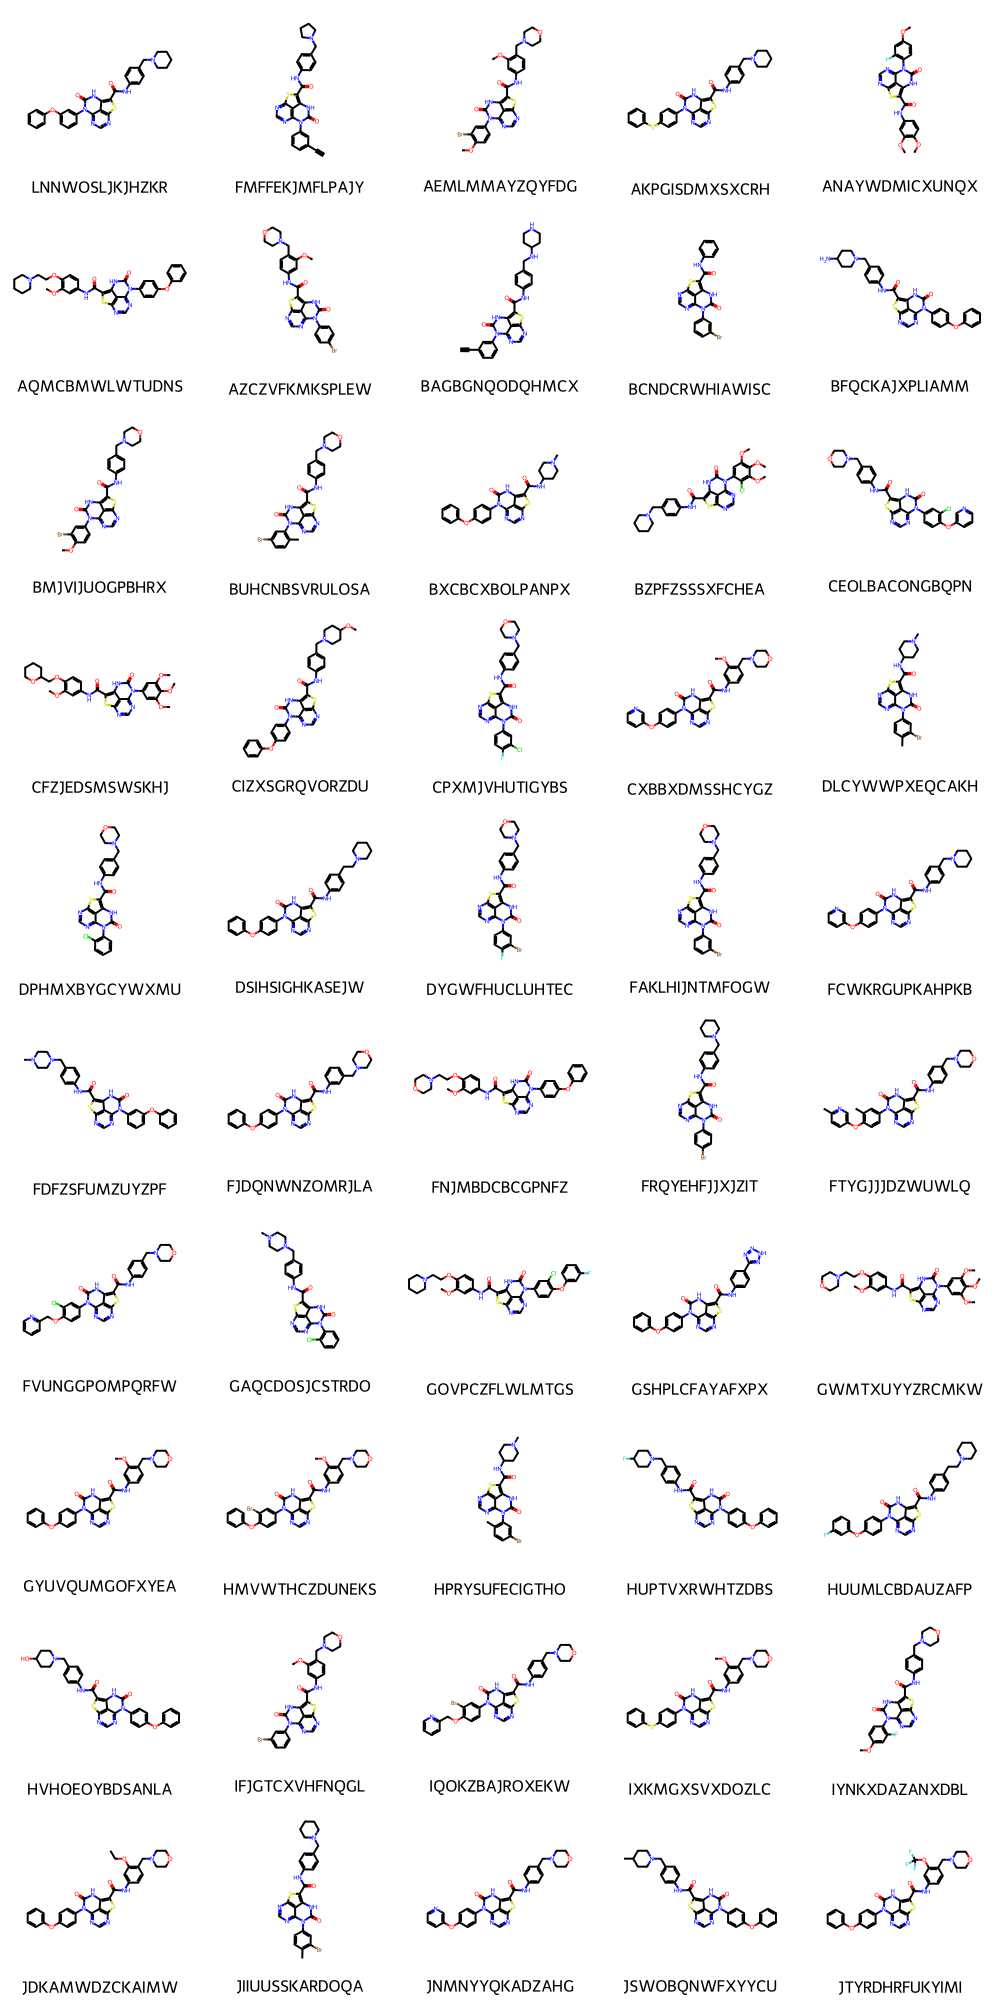

In [9]:
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[0]],
    legends=[compounds[i][1] for i in clusters[0]],
    molsPerRow=5,
)

In [10]:
def GetRingSystems(mol, includeSpiro=False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems

def visualize_subset(accession_data, subset, match_type, substructure_to_match):
    subset_df = accession_data[accession_data['connectivity'].isin(subset)]
    # Keep first occurence
    subset_df.drop_duplicates(subset='connectivity', keep='first', inplace=True, ignore_index=True)

    # Compute molecule from smiles
    PandasTools.AddMoleculeColumnToFrame(subset_df,'SMILES','Molecule',includeFingerprints=True)

    # Extract RDkit molecular objects
    mMols = subset_df['Molecule'].tolist()

    if match_type == 'Murcko':
    # Calculate Murcko Scaffold Hashes
        murckoHashList = [rdMolHash.MolHash(mMol, rdkit.Chem.rdMolHash.HashFunction.MurckoScaffold) for mMol in mMols]

        # Get the most frequent Murcko Scaffold Hash
        def mostFreq(list):
            return max(set(list), key=list.count)
        mostFreq_murckoHash = mostFreq(murckoHashList)

        # Display molecules with MurkoHash as legends and highlight the mostFreq_murckoHash
        mostFreq_murckoHash_mol = Chem.MolFromSmiles(mostFreq_murckoHash)
        highlight_match = [mMol.GetSubstructMatch(mostFreq_murckoHash_mol) for mMol in mMols]

    elif match_type == 'MCS':
        mcs = rdFMCS.FindMCS(mMols)
        match_mol = Chem.MolFromSmarts(mcs.smartsString)
        highlight_match = [mMol.GetSubstructMatch(match_mol) for mMol in mMols]

    elif match_type == 'ring':
        # Extract ring systems for each molecule
        ringSys_list = [GetRingSystems(mMol) for mMol in mMols]
        # Keep the biggest ring system for each molecule
        highlight_match = [max(ringSys, key=len) for ringSys in ringSys_list]

    elif match_type == 'SMILES':
        match_mol = Chem.MolFromSmiles(substructure_to_match[match_type])
        highlight_match = [mMol.GetSubstructMatch(match_mol) for mMol in mMols]

    elif match_type == 'SMARTS':
        match_mol = Chem.MolFromSmarts(substructure_to_match[match_type])
        highlight_match = [mMol.GetSubstructMatch(match_mol) for mMol in mMols]


    return mMols, highlight_match



In [112]:
substructure_match_dict = {'P00533':{'SMILES':'CNc1ncnc2ccccc12',
                                     'SMARTS':'a1aaaaa1'},
                           'P00519':{'SMILES':'COc1ncnc2ccccc12',
                                     'SMARTS':'a1aaaaa1Na1aaaaa1'}
                           }

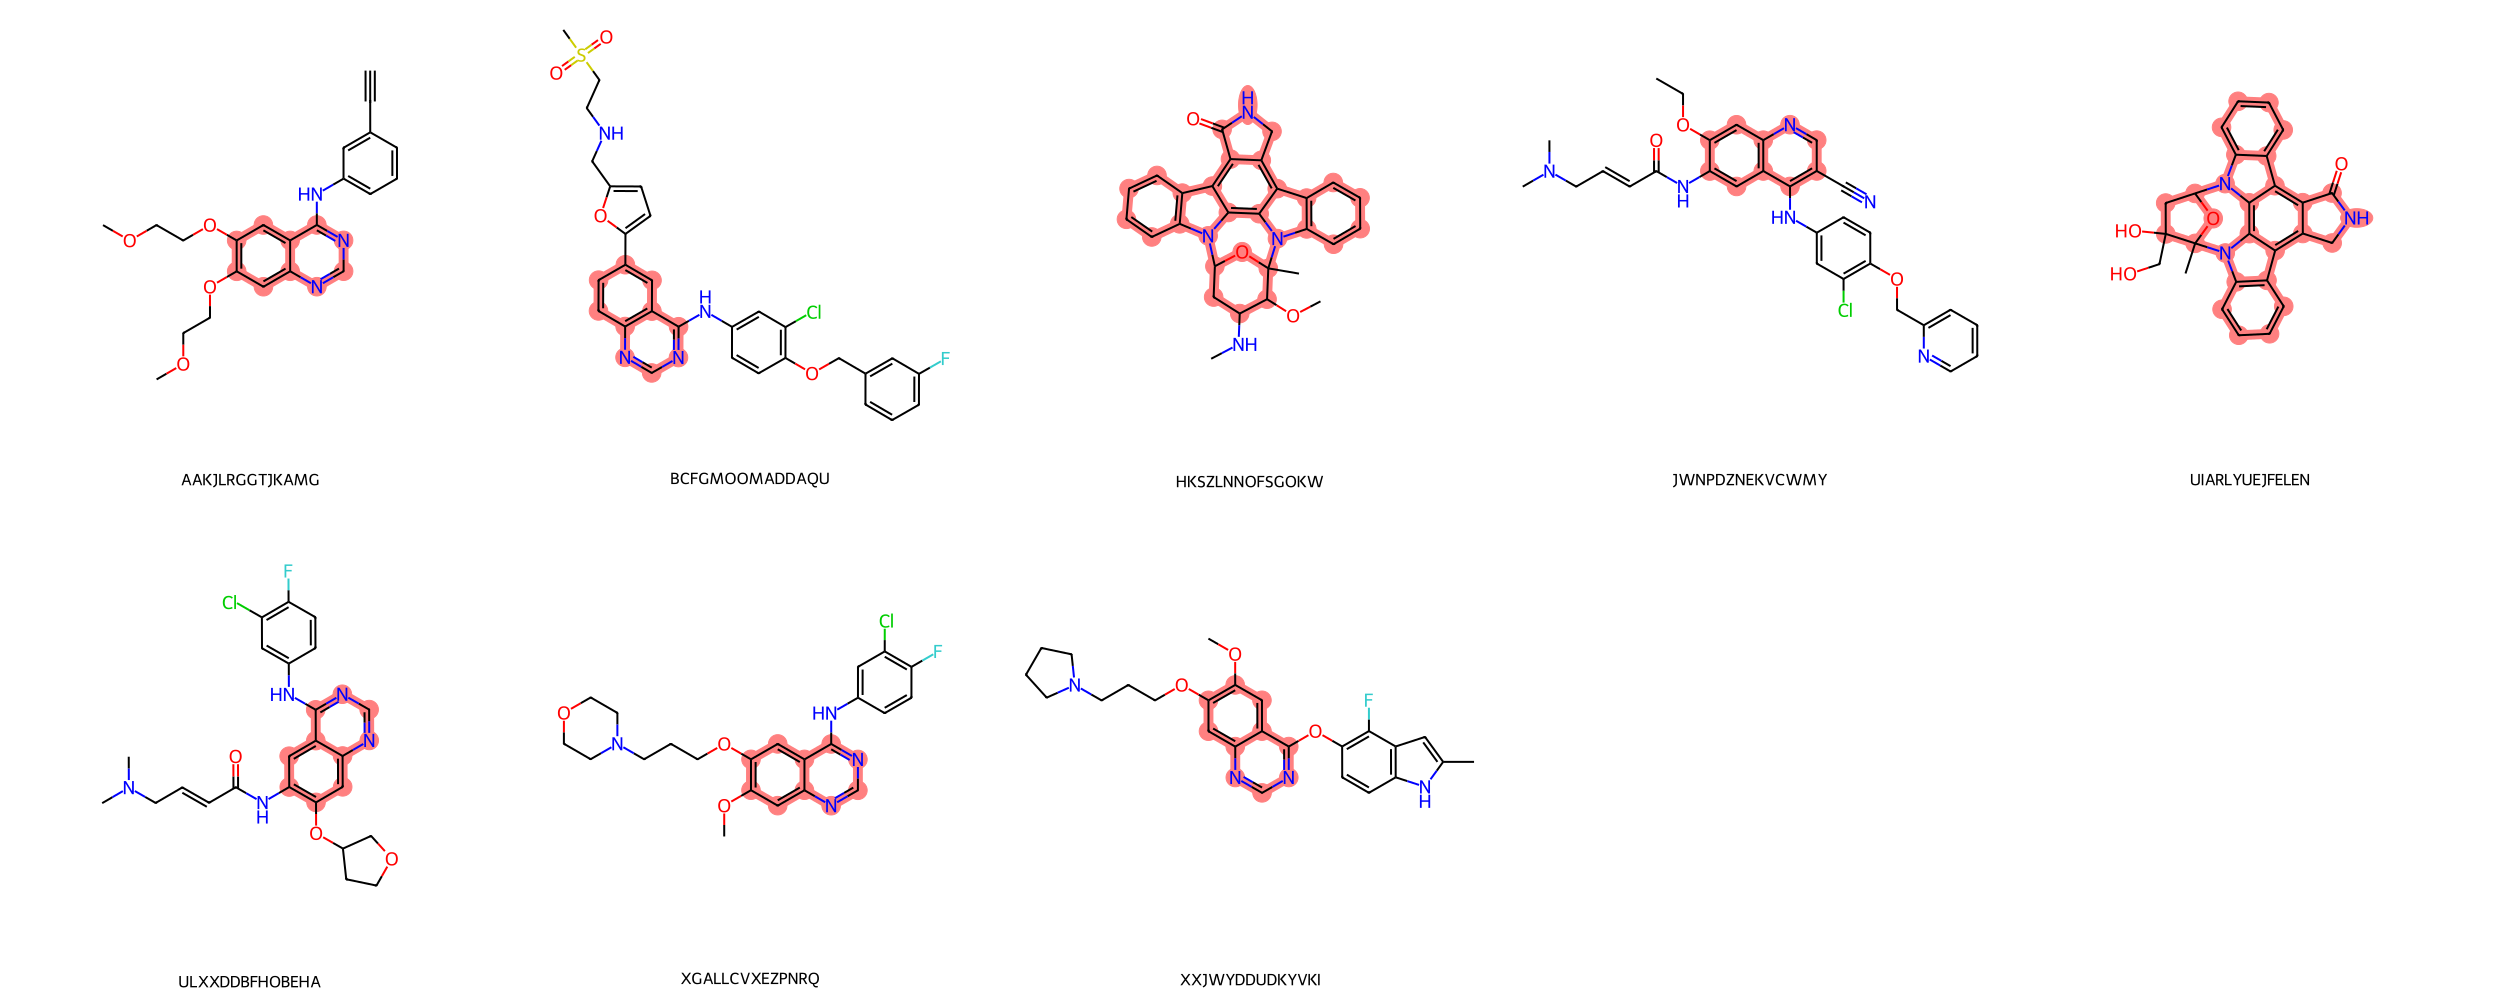

In [113]:
mMols, highlight_match = visualize_subset(accession_data, strict_subset, 'ring',
                                                 substructure_match_dict[accession])
Draw.MolsToGridImage(mMols,legends=strict_subset,
                     highlightAtomLists = highlight_match,
                     subImgSize=(500,500), useSVG=False, molsPerRow=5)

In [12]:
for cluster in [1]:
    cluster_connectivities = [k for k, v in connectivity_cluster_dict.items() if v == cluster]

In [14]:
mMols, highlight_match = visualize_subset(accession_data, cluster_connectivities, 'MCS',
                                             substructure_match_dict[accession])
Draw.MolsToGridImage(mMols,legends=cluster_connectivities,
                     highlightAtomLists = highlight_match,
                     subImgSize=(500,500), useSVG=False, molsPerRow=5)

NameError: name 'substructure_match_dict' is not defined

In [116]:
for cluster in [2]:
    cluster_connectivities = [k for k, v in connectivity_cluster_dict.items() if v == cluster]

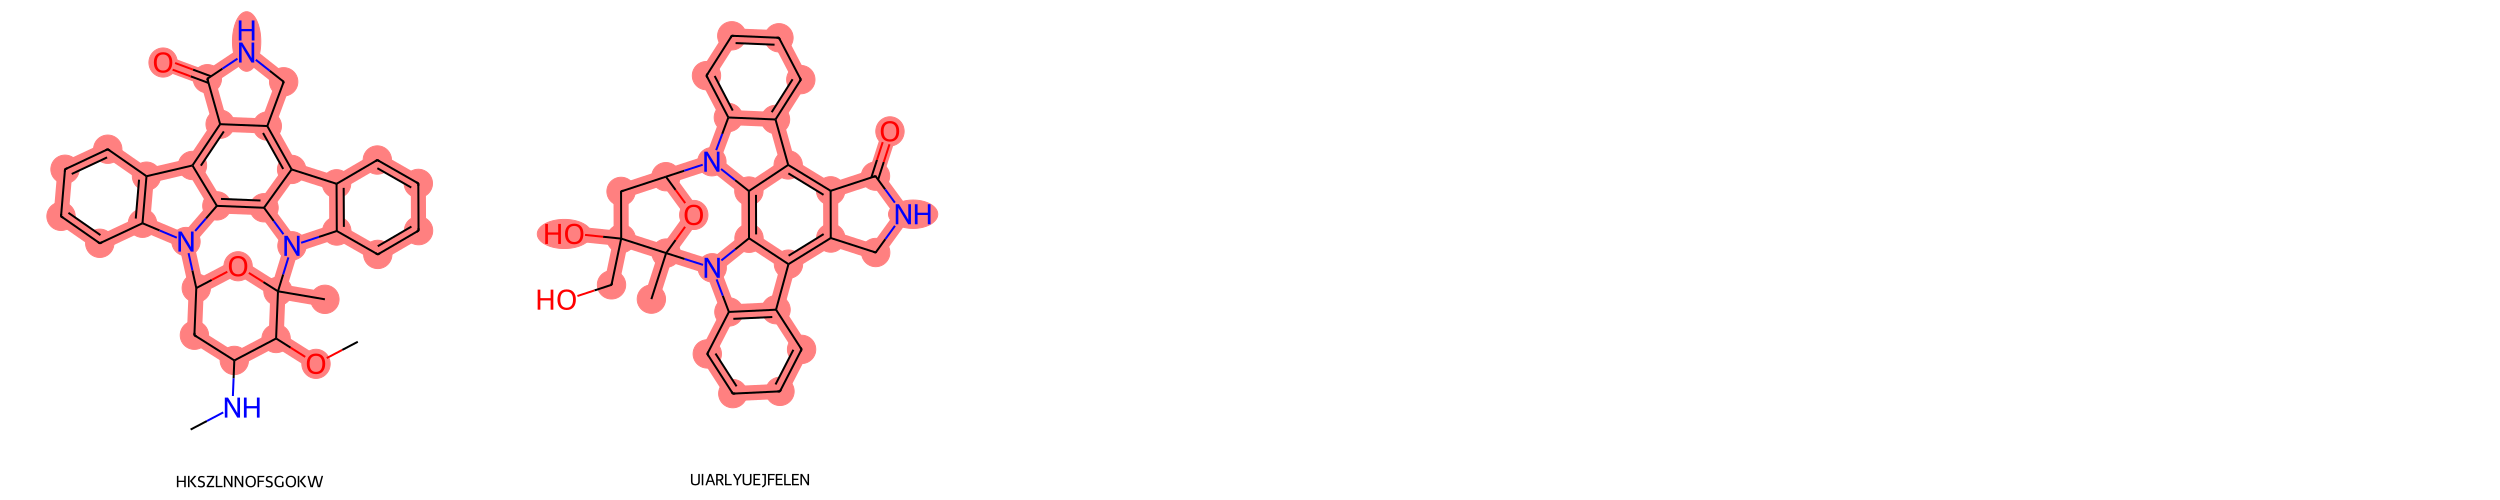

In [117]:
mMols, highlight_match = visualize_subset(accession_data, cluster_connectivities, 'MCS',
                                             substructure_match_dict[accession])
Draw.MolsToGridImage(mMols,legends=cluster_connectivities,
                     highlightAtomLists = highlight_match,
                     subImgSize=(500,500), useSVG=False, molsPerRow=5)

In [118]:
def plot_strict_subset_bioactivity_clustermap_ButinaCluster_groups(accession_data, accession: str,
                                                                   connectivity_cluster_dict,
                                                                   common: bool, sim: bool,sim_thres: int, threshold:
        int, variant_coverage: float, output_dir: str):
    # Read bioactivity data for common subset precalculated
    data_accession = pd.read_csv(os.path.join(output_dir, f'modelling_dataset_{accession}_Thr{threshold}_Cov'
                                                          f'{int(variant_coverage*100)}_Sim'
                                                          f'{int(sim_thres*100)}.csv'), sep='\t')

    # Pivot data to plot heatmap
    heatmap_df = data_accession.pivot(index='target_id', columns='connectivity', values='pchembl_value_Mean')

    # Keep df with strictly common subset
    strict_subset_df = heatmap_df[heatmap_df.columns[~heatmap_df.isnull().any()]]

    # Map strictly common subset to its butina cluster
    strict_subset_cluster = [connectivity_cluster_dict[connectivity] for connectivity in strict_subset_df.columns]

    # Assign a color to each possible cluster
    clusters = sorted(list(set(connectivity_cluster_dict.values())))
    cluster_colors = mcp.gen_color(cmap='flare', n=len(clusters))
    cluster_color_dict = dict(zip(clusters, cluster_colors))

    # Map each molecule in the strictly common subset to its color based on the Butina cluster
    strict_subset_color = [cluster_color_dict[cluster] for cluster in strict_subset_cluster]

    # Clustermap with exclusively common subset (no NAs)
    sns.clustermap(strict_subset_df, cmap='mako_r',
                   linewidth=0.1, linecolor='w', cbar_kws={'label': 'pChEMBL value (Mean)'},
                   col_colors=strict_subset_color)

    # Add legend of year-based color of molecules
    strict_subset_cluster_color_dict = dict(sorted(zip(strict_subset_cluster, strict_subset_color)))
    handles = [Patch(facecolor=color) for color in strict_subset_cluster_color_dict.values()]
    labels = strict_subset_cluster_color_dict.keys()

    plt.legend(handles, labels, title='Butina cluster',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

    # save figure
    plt.savefig(os.path.join(output_dir, f'test_clustermap_{accession}_ButinaCluster_groups.svg'))

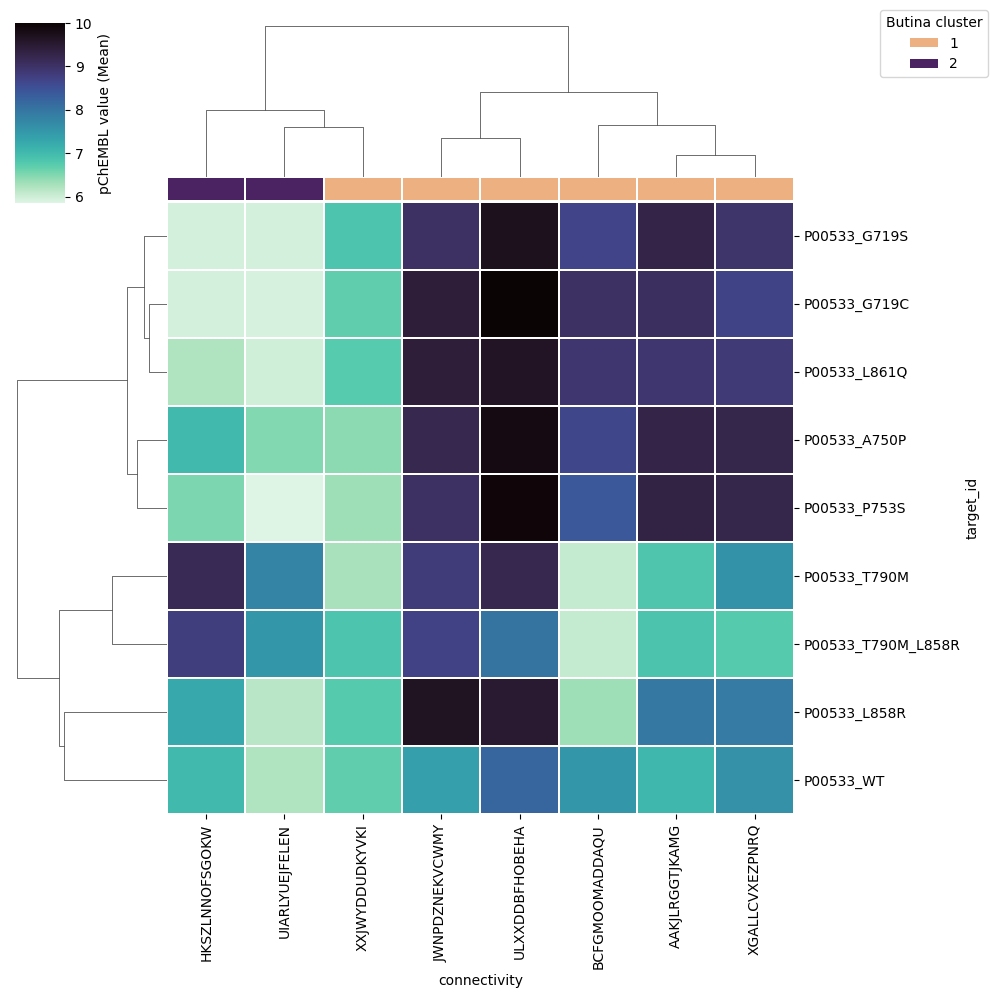

In [119]:
plot_strict_subset_bioactivity_clustermap_ButinaCluster_groups(accession_data, accession, connectivity_cluster_dict,
                                                       common=True, sim=True,
                                                      sim_thres=0.8,threshold=2,variant_coverage=0.2, output_dir=os.path.join(output_dir,
                                                                                      'common_subset_20_sim_80'))

In [120]:
def plot_strict_subset_bioactivity_clustermap_year_groups(accession_data, accession: str, common: bool, sim: bool,
                                                     sim_thres: int, threshold: int, variant_coverage: float,
                                                     output_dir: str):
    # Read bioactivity data for common subset precalculated
    data_accession = pd.read_csv(os.path.join(output_dir, f'modelling_dataset_{accession}_Thr{threshold}_Cov'
                                                          f'{int(variant_coverage*100)}_Sim'
                                                          f'{int(sim_thres*100)}.csv'), sep='\t')

    # Pivot data to plot heatmap
    heatmap_df = data_accession.pivot(index='target_id', columns='connectivity', values='pchembl_value_Mean')

    # Keep df with strictly common subset
    strict_subset_df = heatmap_df[heatmap_df.columns[~heatmap_df.isnull().any()]]

    # Extract years of publication for strictly common subset
    connectivity_to_year_dict = dict(zip(accession_data.connectivity, accession_data.Year))
    strict_subset_year = [int(connectivity_to_year_dict[connectivity]) if (connectivity in connectivity_to_year_dict
                                                                        .keys())
                          else 0 for connectivity in strict_subset_df.columns ]

    # Assign a color to each possible year in the full accession bioactivity set
    year_range = list(range(int(min(connectivity_to_year_dict.values())), int(max(connectivity_to_year_dict.values()))
                           , 1))
    year_colors = mcp.gen_color(cmap='flare', n=len(year_range))
    year_color_dict = dict(zip(year_range, year_colors))
    year_color_dict[0] = '#FFFFFF' # Missing year is white

    # Map each molecule in the strictly common subset to its color based on the publication year
    strict_subset_color = [year_color_dict[int(year)] for year in strict_subset_year]

    # # Clustermap with NAs replaced by zero
    # sns.clustermap(heatmap_df.fillna(0), cmap='mako_r',
    #                linewidth=0.1, linecolor='w', cbar_kws={'label': 'pChEMBL value (Mean)'},
    #                col_colors=strict_subset_color)

    # Clustermap with exclusively common subset (no NAs)
    sns.clustermap(strict_subset_df, cmap='mako_r',
                   linewidth=0.1, linecolor='w', cbar_kws={'label': 'pChEMBL value (Mean)'},
                   col_colors=strict_subset_color)

    # Add legend of year-based color of molecules
    strict_subset_year_color_dict = dict(sorted(zip(strict_subset_year, strict_subset_color)))
    handles = [Patch(facecolor=color) for color in strict_subset_year_color_dict.values()]
    labels = strict_subset_year_color_dict.keys()

    plt.legend(handles, labels, title='Year',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

    # save figure
    plt.savefig(os.path.join(output_dir, f'test_clustermap_{accession}_year_groups.svg'))

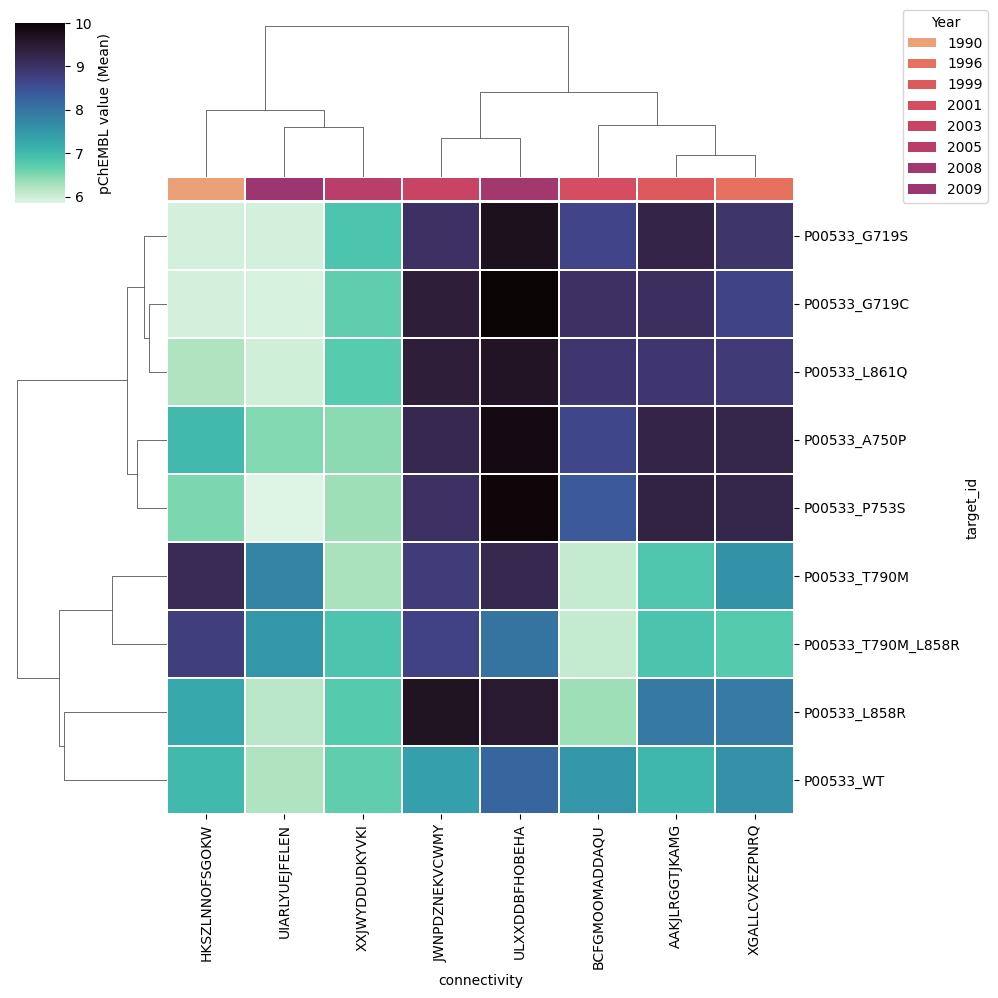

In [121]:
plot_strict_subset_bioactivity_clustermap_year_groups(accession_data, accession, common=True, sim=True,
                                                      sim_thres=0.8,threshold=2,variant_coverage=0.2, output_dir=os.path.join(output_dir,
                                                                                      'common_subset_20_sim_80'))

In [ ]:
# Next idea: color mutants based on distance from mutated residue to center of mass of ligand (calculated in Pymol),
# or closest distance to ligand

# Also, mutants can be colored based on the year of the first assay on them. This will show "when" (approximately)
# they emerged into public knowledge/relevance compared to other mutants